<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

plot_format = 'png'

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [5]:
#ваш код здесь
df = pd.read_csv("database.csv", encoding='utf-8', sep=';')
currency_data = pd.read_csv("exchange_rates.csv", encoding='utf-8', sep=',')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [6]:
#ваш код здесь
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [7]:
#ваш код здесь
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

(44744, 12)

4. Обратите внимание на информацию о числе непустых значений.

In [8]:
#ваш код здесь
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
dtype: int64


5. Выведите основную статистическую информацию о столбцах.


In [9]:
#ваш код здесь
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [10]:
#ваш код здесь
# Функция для извлечения уровня образования
def extract_education_level(text):
    # Извлекаем первые два слова
    words = text.split()[:2]
    # Объединяем их в строку
    level = ' '.join(words)
    
    # Сопоставляем с категориями
    if level == 'Высшее образование':
        return 'высшее'
    elif level == 'Неоконченное высшее':
        return 'неоконченное высшее'
    elif level == 'Среднее специальное':
        return 'среднее специальное'
    elif level == 'Среднее образование':
        return 'среднее'
    else:
        return 'неизвестно'

# Применяем функцию к столбцу "Образование и ВУЗ"
df['Образование'] = df['Образование и ВУЗ'].apply(extract_education_level)

# Удаляем столбец "Образование и ВУЗ"
df.drop(columns=['Образование и ВУЗ'], inplace=True)

# Проверяем уникальные значения в новом столбце "Образование"
print(df['Образование'].unique())

# Подсчитываем количество соискателей с каждым уровнем образования
education_counts = df['Образование'].value_counts()

# Выводим количество соискателей со средним уровнем образования
print(f"Количество соискателей со средним уровнем образования: {education_counts['среднее']}")

['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']
Количество соискателей со средним уровнем образования: 559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [11]:
#ваш код здесь
# Функция для извлечения пола и возраста
def extract_gender_and_age(text):
    # Разбиваем строку по символу ', '
    parts = text.split(' , ')
    
    # Извлекаем пол и преобразуем в нужный формат
    gender = parts[0]
    if gender == 'Мужчина':
        gender = 'М'
    elif gender == 'Женщина':
        gender = 'Ж'
    
    # Извлекаем возраст и преобразуем в целое число
    age_str = parts[1].split()[0]  # Извлекаем числовое значение возраста
    age = int(age_str)
    
    return gender, age

# Применяем функцию к столбцу "Пол, возраст"
df[['Пол', 'Возраст']] = df['Пол, возраст'].apply(lambda x: pd.Series(extract_gender_and_age(x)))

# Удаляем столбец "Пол, возраст"
df.drop(columns=['Пол, возраст'], inplace=True)

# Проверяем уникальные значения в столбцах "Пол"
df['Пол'].unique()

# Подсчитываем количество женских резюме
female_count = df[df['Пол'] == 'Ж'].shape[0]
total_count = df.shape[0]

# Вычисляем процент женских резюме
female_percentage = (female_count / total_count) * 100
female_percentage = round(female_percentage, 2)

# Вычисляем средний возраст соискателей
average_age = df['Возраст'].mean()
average_age = round(average_age, 1)

# Выводим результаты
print(f"Процент женских резюме: {female_percentage}%")
print(f"Средний возраст соискателей: {average_age}")

Процент женских резюме: 19.07%
Средний возраст соискателей: 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [12]:
#ваш код здесь

# Функция для извлечения опыта работы в месяцах
def get_experience(arg):
    if arg is np.nan or arg == 'Не указано':
        return None
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)

# Применяем функцию к столбцу "Опыт работы"
df['Опыт работы (месяц)'] = df['Опыт работы'].apply(get_experience)

# Удаляем старый столбец "Опыт работы"
df.drop(columns=['Опыт работы'], inplace=True)

# Находим медианный опыт работы в месяцах
median_experience = df['Опыт работы (месяц)'].median()

# Выводим результат
print(f"Медианный опыт работы в месяцах: {median_experience}")


Медианный опыт работы в месяцах: 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [13]:
#ваш код здесь

# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

# Функция для извлечения готовности к переезду
def get_ready_to_move(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True

# Функция для извлечения готовности к командировкам
def get_ready_for_bisiness_trips(arg):
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):
            return False
        else: 
            
            return True
    else:
        return False


# Функция для извлечения города
def get_city(arg):
    city = arg.split(' , ')[0]
    if (city == 'Москва') or (city == 'Санкт-Петербург'):
        return city
    elif city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'


# Применяем функций к столбцу "Город, переезд, командировки"
df['Город'] = df['Город, переезд, командировки'].apply(get_city)
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(get_ready_to_move)
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)

# Удаляем столбец "Город, переезд, командировки"
df.drop(columns=['Город, переезд, командировки'], inplace=True)


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [14]:
#ваш код здесь
# Списки всех возможных категорий
employment_types = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule_types = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

# Функция для создания бинарных признаков
def create_binary_features(df, column, categories):
    for category in categories:
        column_name = category.title()
        df[column_name] = df[column].apply(lambda x: category in x)
    return df

# Создаем бинарные признаки для занятости
df = create_binary_features(df, 'Занятость', employment_types)

# Создаем бинарные признаки для графика работы
df = create_binary_features(df, 'График', schedule_types)

# Удаляем исходные столбцы "Занятость" и "График"
df.drop(columns=['Занятость', 'График'], inplace=True)

# Подсчитываем количество людей, ищущих проектную работу и волонтёрство
project_and_volunteer_count = df[(df['Проектная Работа'] == True) & (df['Волонтерство'] == True)].shape[0]
print(f"Количество людей, ищущих проектную работу и волонтёрство: {project_and_volunteer_count}")

# Подсчитываем количество людей, желающих работать вахтовым методом и с гибким графиком
shift_and_flexible_count = df[(df['Вахтовый Метод'] == True) & (df['Гибкий График'] == True)].shape[0]
print(f"Количество людей, желающих работать вахтовым методом и с гибким графиком: {shift_and_flexible_count}")

Количество людей, ищущих проектную работу и волонтёрство: 436
Количество людей, желающих работать вахтовым методом и с гибким графиком: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [15]:
#ваш код здесь

# Преобразуем столбцы с датой в формат datetime и выделим только дату
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True).dt.date
currency_data['date'] = pd.to_datetime(currency_data['date'], dayfirst=True).dt.date

# Выделяем сумму заработной платы и валюту
def get_salary_num(arg):
    salary = float(arg.split(' ')[0])
    return salary

def get_salary_currency(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = arg.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict[curr]

df['ЗП_сумма'] = df['ЗП'].apply(get_salary_num)
df['Валюта'] = df['ЗП'].apply(get_salary_currency)

# Объединяем таблицы
df = df.merge(
    currency_data,
    left_on=['Валюта', 'Обновление резюме'],
    right_on=['currency', 'date',], 
    how='left',
    )
df['close'] = df['close'].fillna(1)
df['proportion'] = df['proportion'].fillna(1)

# Вычисляем заработную плату в рублях
df['ЗП (руб)'] = df['close'] * df['ЗП_сумма'] / df['proportion']

# удаляем лишник признаки
df = df.drop(['ЗП_сумма', 'currency', 'proportion', 'vol', 'close', 'time', 'date', 'per', 'Валюта', 'ЗП'], axis=1)

# Вычисляем медианную заработную плату
median_salary = df['ЗП (руб)'].median()
print(f'Желаемая медианная заработная плата соискателей: {median_salary} рублей')

/var/folders/zf/cg3sbbt500x0hs8pwdn7nmnm0000gn/T/ipykernel_6335/1945950440.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  currency_data['date'] = pd.to_datetime(currency_data['date'], dayfirst=True).dt.date


Желаемая медианная заработная плата соискателей: 59019.0 рублей


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

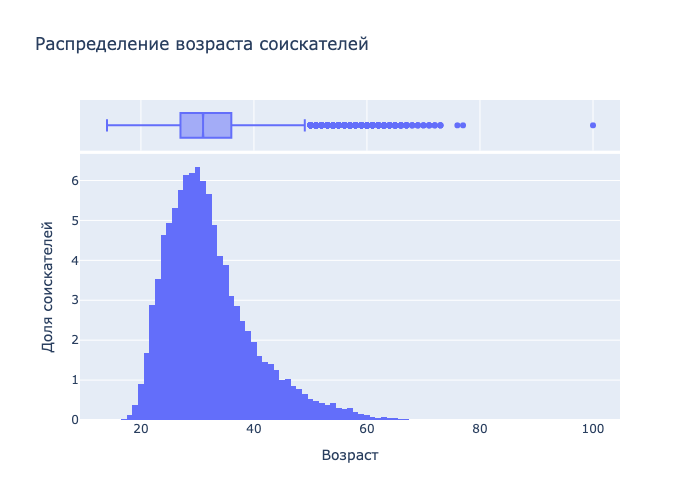

Мода распределения: 30
Предельные значения: 14 - 100
Возраст большинства соискателей находится в интервале: 27.0 - 36.0


In [16]:
# ваш код здесь

# Создание графиков
fig = px.histogram(
    data_frame=df,
    x='Возраст',
    title='Распределение возраста соискателей',
    histnorm='percent',
    marginal='box',
)

fig.update_layout(
    yaxis=dict(
        title='Доля соискателей',
    ),
)

# Отображение графиков
fig.show(plot_format)

# Рассчитываем моду распределения
mode_age = df['Возраст'].mode()[0]

# Определяем предельные значения
min_age = df['Возраст'].min()
max_age = df['Возраст'].max()

# Определяем интервал, в котором находится большинство соискателей
age_quartiles = df['Возраст'].quantile([0.25, 0.75])


# Выводим результаты анализа
print(f"Мода распределения: {mode_age}")
print(f"Предельные значения: {min_age} - {max_age}")
print(f"Возраст большинства соискателей находится в интервале: {age_quartiles[0.25]} - {age_quartiles[0.75]}")


ваши выводы по графику здесь
* Наиболее часто встречающееся значение возраста среди соискателей составляет 30 лет.
* Большинство соискателей находятся в возрасте от 27 до 36 лет.
* Возраст соискателей варьируется от 14 до 100 лет. Минимальный возраст в 14 лет может свидетельствовать о наличии молодежи, которая только начинает свою карьеру, однако это также может быть аномалией, если ожидается, что соискатели должны быть старше 18 лет. Максимальный возраст в 100 лет также может указывать на аномалии в данны.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

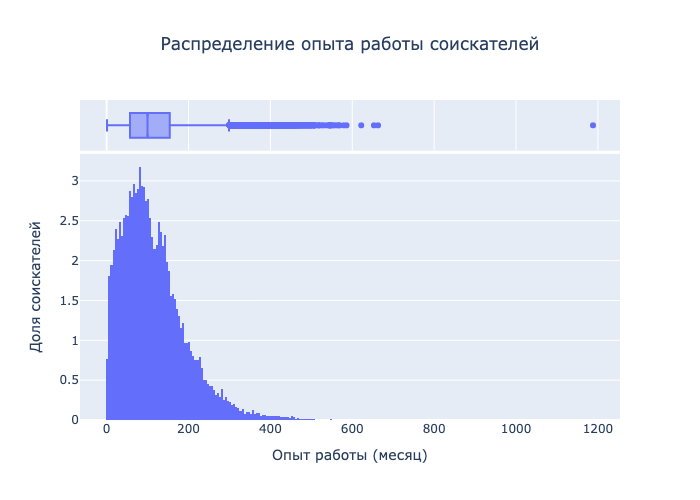

Мода распределения: 81.0
Предельные значения: 1.0 - 1188.0
Опыт работы большинства соискателей находится в интервале: 57.0 - 154.0


In [17]:
# ваш код здесь

# Создание графиков
fig = px.histogram(
    data_frame=df,
    x='Опыт работы (месяц)',
    title='Распределение опыта работы соискателей',
    histnorm='percent',
    marginal='box',
)

fig.update_layout(
    title_x=0.5,
    yaxis=dict(
        title = 'Доля соискателей',
    ),
)

# Отображение графиков
fig.show(plot_format)

# Рассчитываем моду распределения
mode_experience = df['Опыт работы (месяц)'].mode()[0]

# Определяем предельные значения
min_experience = df['Опыт работы (месяц)'].min()
max_experience = df['Опыт работы (месяц)'].max()

# Определяем интервал, в котором находится большинство соискателей
experience_quartiles = df['Опыт работы (месяц)'].quantile([0.25, 0.75])

# Выводим результаты анализа
print(f"Мода распределения: {mode_experience}")
print(f"Предельные значения: {min_experience} - {max_experience}")
print(f"Опыт работы большинства соискателей находится в интервале: {experience_quartiles[0.25]} - {experience_quartiles[0.75]}")

ваши выводы здесь
* Наиболее часто встречающееся значение опыта работы среди соискателей составляет 81 месяц (или примерно 6,5 лет).
* Минимальный опыт: 1 месяц. Это значение может свидетельствовать о наличии соискателей, которые только начинают свою карьеру.
* Максимальный опыт: 1188 месяцев (или 99 лет). Это значение может указывать на аномалии в данных.
* Большинство соискателей имеют опыт работы в диапазоне от 57 до 154 месяцев (примерно от 5 до 13 лет). Это говорит о том, что основная часть соискателей имеет значительный опыт работы.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


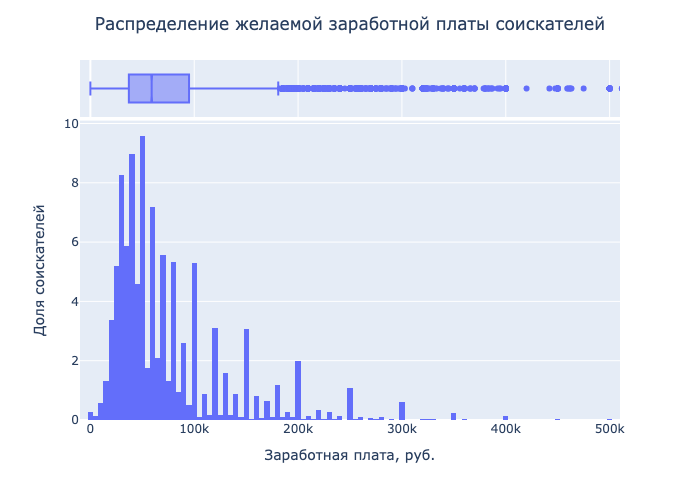

Мода распределения: 50000.0
Предельные значения: 1.0 - 24304876.0
Ожидания по зарплате для большинства соискателей находятся в интервале: 37082.2 - 95000.0
Количество соискателей, требующих заработную плату выше 1 миллиона рублей: 5


In [18]:
# ваш код здесь

# Создание графиков
fig = px.histogram(
    data_frame=df,
    x='ЗП (руб)',
    histnorm='percent',
    marginal='box'
)

fig.update_layout(
    title='Распределение желаемой заработной платы соискателей',
    title_x=0.5,
    yaxis=dict(
        title = 'Доля соискателей',
    ),
    xaxis=dict(
        title='Заработная плата, руб.',
        range=[-1e4, 5e5 + 1e4],
    ),
)

# Отображаем график
fig.show(plot_format)

# Рассчитываем моду распределения
mode_experience = df['ЗП (руб)'].mode()[0]

# Определяем предельные значения
min_experience = df['ЗП (руб)'].min()
max_experience = df['ЗП (руб)'].max()

# Определяем интервал, в котором находится большинство соискателей
experience_quartiles = df['ЗП (руб)'].quantile([0.25, 0.75])

# Выводим результаты анализа
print(f"Мода распределения: {mode_experience}")
print(f"Предельные значения: {min_experience} - {max_experience}")
print(f"Ожидания по зарплате для большинства соискателей находятся в интервале: {experience_quartiles[0.25]} - {experience_quartiles[0.75]}")

# Определяем количество соискателей с заработной платой выше 1 миллиона рублей
high_salary_count = df[df['ЗП (руб)'] > 1000000].shape[0]
print(f"Количество соискателей, требующих заработную плату выше 1 миллиона рублей: {high_salary_count}")

ваши выводы здесь
* Наиболее часто встречающееся значение ожидаемой заработной платы среди соискателей составляет 50,000 рублей. 
* Минимальная заработная плата: 1 рубль. Это значение является крайне низким и может указывать на аномалии в данных
* Максимальная заработная плата: 24,304,876 рублей. Это значение является крайне высоким и может указывать на аномалии в данных.
* Ожидания по зарплате для большинства соискателей находятся в диапазоне от 37,082.2 до 95,000 рублей.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

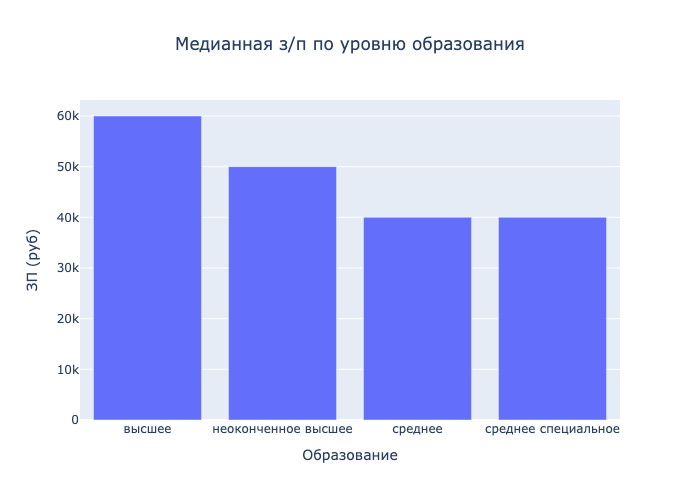

In [19]:
# ваш код здесь
# Отфильтровываем данные, оставив только те, где желаемая заработная плата меньше 1 млн рублей
df_filtered = df[df['ЗП (руб)'] < 1000000]

# Рассчитываем медианную заработную плату для каждого уровня образования
median_salary_by_education = df_filtered.groupby('Образование')['ЗП (руб)'].median().reset_index()

# Столбчатая диаграмма
bar_data = median_salary_by_education
fig = px.bar(
    data_frame=bar_data,
    x='Образование',
    y='ЗП (руб)',
    title='Медианная з/п по уровню образования'
)

fig.update_layout(
    title_x=0.5,
)

# Отображаем график
fig.show(plot_format)

ваши выводы здесь
* Cоискатели с высшим образованием имеют более высокую медианную заработную плату по сравнению с соискателями со средним и средним специальным образованием.
* Уровень образования действительно важен при прогнозировании заработной платы, так как он оказывает влияние на желаемую заработную плату соискателей.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

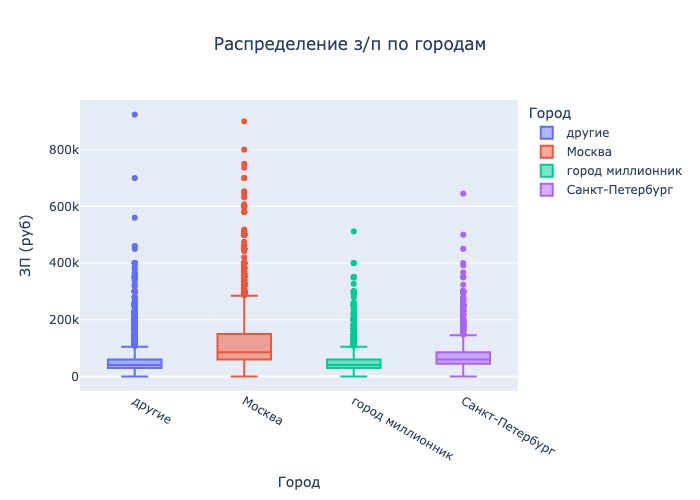

In [20]:
# ваш код здесь

# Ящик с усами (boxplot)
box_data = df[df['ЗП (руб)']<1e6]
fig = px.box(
    data_frame=box_data,
    x='Город',
    y='ЗП (руб)',
    color='Город',
    title='Распределение з/п по городам'
)

fig.update_layout(
    title_x=0.5,
)

# Отображаем график
fig.show(plot_format)

ваши выводы здесь
* Медианная заработная плата в Москве самая высокая среди всех представленных городов. Это ожидаемо, так как Москва является столицей.
* Медианная заработная плата в Санкт-Петербурге ниже, чем в Москве, но выше, чем в других городах. Это также ожидаемо, так как Санкт-Петербург является вторым по величине городом России.
* Размах заработных плат в Москве самый большой.
* В каждом городе (категории) можно наблюдать аномально высокие значения желаемой заработной платы (выбросы)
* Признак города важно учитывать при прогнозировании заработной платы, так как уровень заработной платы значительно варьируется в зависимости от города.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

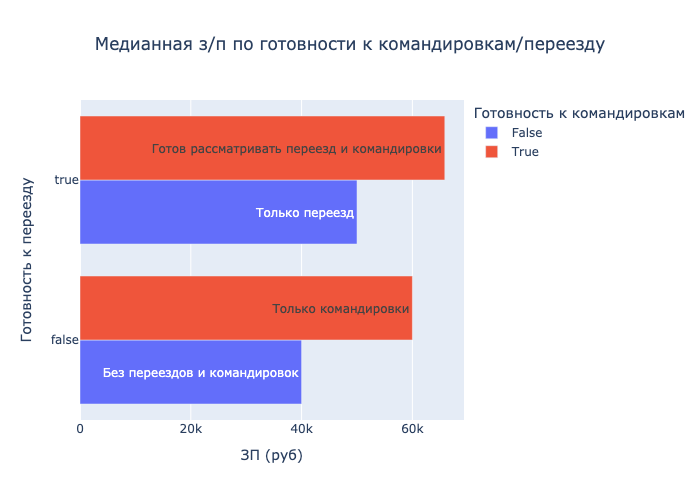

Желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам: 66 тыс. рублей


In [21]:
# ваш код здесь

# Построение многоуровневой столбчатой диаграммы
bar_data = df.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=bar_data,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная з/п по готовности к командировкам/переезду',
    text=['Без переездов и командировок', 'Только переезд', 'Только командировки', \
          'Готов рассматривать переезд и командировки'],
)

fig.update_layout(
    title_x=0.5,
)

# Отображаем график
fig.show(plot_format)

# Рассчитываем медианную заработную плату для соискателей, готовых и к переезду, и к командировкам
median_salary_both = df[(df['Готовность к переезду'] == True) & (df['Готовность к командировкам'] == True)]['ЗП (руб)'].median()
median_salary_both_thousands = round(median_salary_both / 1000)  # Округляем до целого в тысячах

print(f'Желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам: {median_salary_both_thousands} тыс. рублей')

ваши выводы здесь
* Готовность к переезду и командировкам существенно повышает уровень заработной платы.
* Наиболее высокие заработные платы у людей, готовых к переезду и командировкам.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

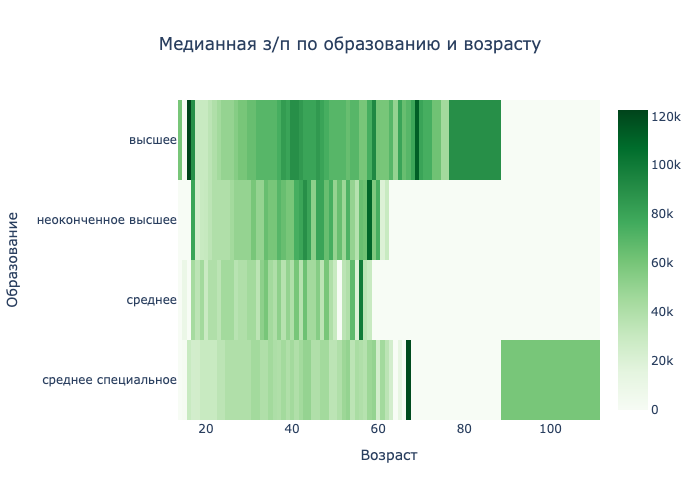

In [22]:
# ваш код здесь

# Построение тепловой карты
pivot = df.pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median',
    fill_value=0
)
fig = px.imshow(
    pivot,
    aspect='auto',
    color_continuous_scale='greens',
    title='Медианная з/п по образованию и возрасту'
)

fig.update_layout(
    title_x=0.5,
)

# Отображаем график
fig.show(plot_format)

ваши выводы здесь
* Во всех категориях образования наблюдается равномерное увеличение желаемой заработной платы от 18 до 40 лет
* Наличие соискателей до 18 лет с высшим образованием говорит об аномалии в данных.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

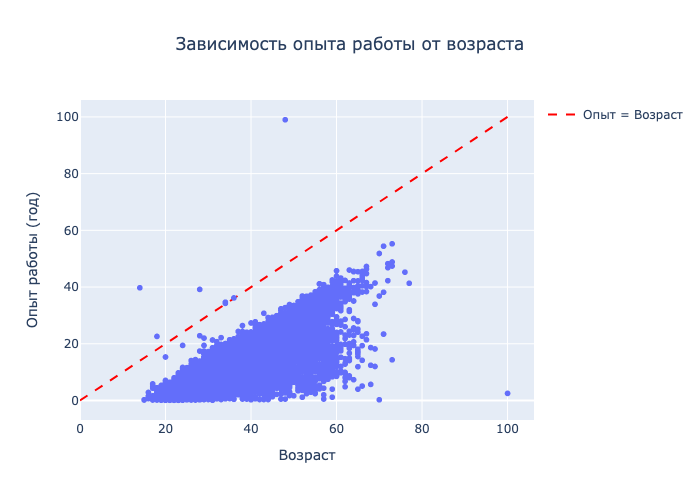

In [23]:
# ваш код здесь

# Переводим опыт работы из месяцев в года
df['Опыт работы (год)'] = df['Опыт работы (месяц)'] / 12

# Создаем диаграмму рассеяния
fig = px.scatter(df, x='Возраст', y='Опыт работы (год)', title='Зависимость опыта работы от возраста')

fig.update_layout(
    title_x=0.5,
)

# Добавляем прямую, проходящую через точки (0, 0) и (100, 100)
fig.add_trace(go.Scatter(x=[0, 100], y=[0, 100], mode='lines', name='Опыт = Возраст', line=dict(color='red', dash='dash')))

# Отображаем график
fig.show(plot_format)

ваши выводы здесь
* На диаграмме проявились аномальные данные. Выявлено 7 точек лежащих в области, где опыт работы больше возраста.
* Точка с возрастом 100 лет и стажем 2,5 года тоже может являться аномалией.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


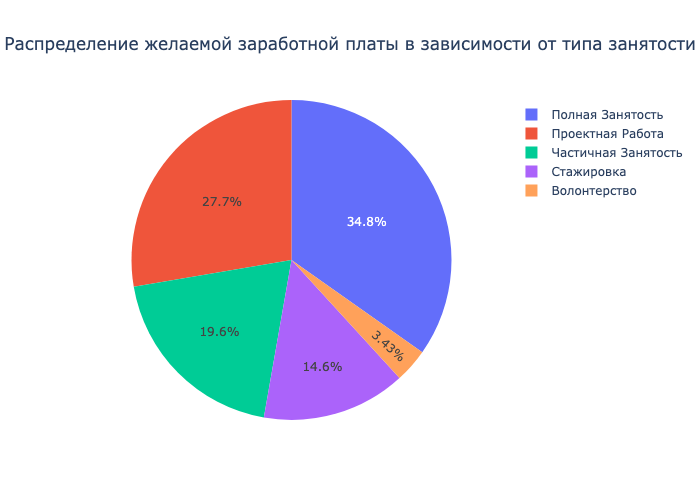

In [24]:
# ваш код здесь
# Создаем столбец с типом занятости
employment_types = ['Полная Занятость', 'Частичная Занятость', 'Проектная Работа', 'Волонтерство', 'Стажировка']
employment_columns = ['Полная Занятость', 'Частичная Занятость', 'Проектная Работа', 'Волонтерство', 'Стажировка']

df['Тип занятости'] = df[employment_columns].idxmax(axis=1)

# Расчет средней заработной платы для каждого типа занятости
mean_salary_by_employment_type = df.groupby('Тип занятости')['ЗП (руб)'].mean().reset_index()

# Построение круговой диаграммы
fig = px.pie(mean_salary_by_employment_type, 
             values='ЗП (руб)', 
             names='Тип занятости', 
             title='Распределение желаемой заработной платы в зависимости от типа занятости',
             labels={'ЗП (руб)': 'Средняя ЗП (руб)', 'Тип занятости': 'Тип занятости'})


fig.update_layout(
    title_x=0.5,
)

fig.show(plot_format)

ваши выводы здесь
* Наибольшая желаемая заработная плата у соискателей с типом занятости "Полная Занятость"
* Наименьшая желаемая заработная плата у соискателей с типом занятости "Волонтерство"

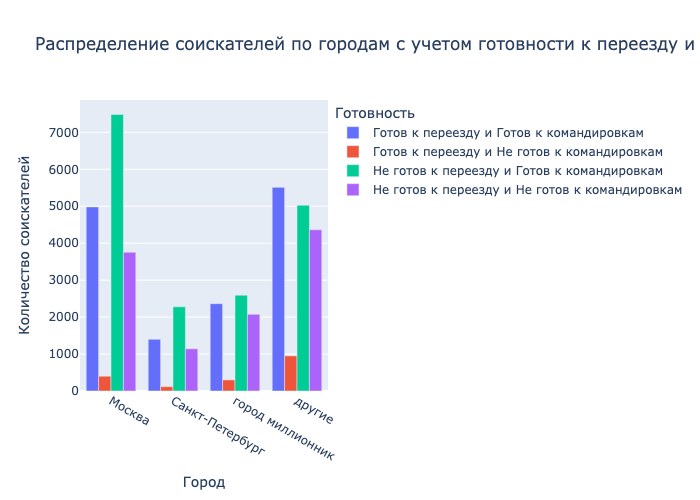

In [25]:
# Создание нового DataFrame с измененными значениями для готовности к переезду и командировкам
df_readable = df.copy()
df_readable['Готовность к переезду'] = df_readable['Готовность к переезду'].replace({True: 'Готов к переезду', False: 'Не готов к переезду'})
df_readable['Готовность к командировкам'] = df_readable['Готовность к командировкам'].replace({True: 'Готов к командировкам', False: 'Не готов к командировкам'})

# Создание столбца с комбинацией готовности к переезду и командировкам
df_readable['Готовность'] = df_readable['Готовность к переезду'] + ' и ' + df_readable['Готовность к командировкам']

# Группировка данных по городу и готовности
grouped_df = df_readable.groupby(['Город', 'Готовность']).size().reset_index(name='Количество')

# Построение диаграммы распределения
fig = px.bar(grouped_df, x='Город', y='Количество', color='Готовность',
             title='Распределение соискателей по городам с учетом готовности к переезду и командировкам',
             labels={'Город': 'Город', 'Количество': 'Количество соискателей', 'Готовность': 'Готовность'},
             barmode='group')

fig.show(plot_format)

ваши выводы здесь
* Для всех городов наблюдается готовность соискателей ездить в командировки.
* В категории городов "другие" наблюдается высокая готовность соискателей к переезду.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [26]:
# ваш код здесь
# Поиск полных дубликатов
duplicates = df[df.duplicated()]

# Удаление полных дубликатов
df.drop_duplicates(inplace=True)

# Вывод информации о дубликатах
print(f"Количество полных дубликатов: {len(duplicates)}")


Количество полных дубликатов: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [27]:
# ваш код здесь
# Подсчет пропусков в каждом столбце
missing_values = df.isnull().sum()

# Вывод информации о пропусках
print(f"Количество пропусков в каждом столбце: {missing_values}")

Количество пропусков в каждом столбце: Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
Полная Занятость                     0
Частичная Занятость                  0
Проектная Работа                     0
Волонтерство                         0
Стажировка                           0
Полный День                          0
Сменный График                       0
Гибкий График                        0
Удаленная Работа                     0
Вахтовый Метод                       0
ЗП (руб)                             0
Опыт работы (год)                  168
Тип занятости            

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [28]:
# ваш код здесь

# Удаление строк с пропусками в столбцах "Последнее/нынешнее место работы" и "Последняя/нынешняя должность"
df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

# Заполнение пропусков в столбце "Опыт работы (месяц)" медианным значением
median_experience = df['Опыт работы (месяц)'].median()
df['Опыт работы (месяц)'].fillna(median_experience)

# Вычисление среднего значения в столбце "Опыт работы (месяц)" после заполнения пропусков
mean_experience = df['Опыт работы (месяц)'].mean()

# Округление результата до целых
mean_experience_rounded = round(mean_experience)

# Вывод результата
print(f"Результирующее среднее значение в столбце 'Опыт работы (месяц)': {mean_experience_rounded}")

Результирующее среднее значение в столбце 'Опыт работы (месяц)': 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [29]:
# ваш код здесь
invalid_salary = (df['ЗП (руб)'] > 1e6) | (df['ЗП (руб)'] < 1e3)

# Вывод информации о числе количестве выбросов
print(f"Количество удаленных резюме: {df[invalid_salary].shape[0]}")

# Удаление резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей
df.drop(df[invalid_salary].index, inplace=True)

Количество удаленных резюме: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [30]:
# ваш код здесь
invalid_experience = (df['Опыт работы (месяц)'] / 12) >= df['Возраст']

# Вывод информации о количестве выбросов
print(f"Количество удаленных резюме: {df[invalid_experience].shape[0]}")

# Удаление резюме в которых опыт работы в годах превышал возраст соискателя
df.drop(df[invalid_experience].index, inplace=True)

Количество удаленных резюме: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

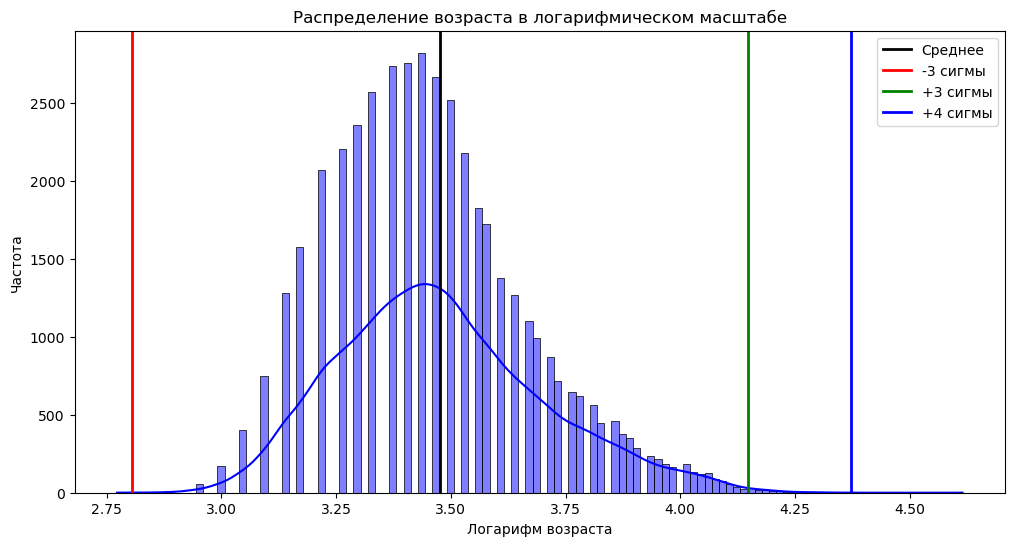

Количество выбросов: 3
Минимальный возраст выбросов: 15
Максимальный возраст выбросов: 100


In [31]:
# ваш код здесь

# Построение распределения признака "Возраст" в логарифмическом масштабе
log_age = np.log(df['Возраст'] + 1)

plt.figure(figsize=(12, 6))
histplot = sns.histplot(log_age, kde=True, color='blue')
plt.title('Распределение возраста в логарифмическом масштабе')
plt.xlabel('Логарифм возраста')
plt.ylabel('Частота')

# Добавление линий, отображающих среднее и границы интервала метода трех сигм
mean_log_age = log_age.mean()
std_log_age = log_age.std()

histplot.axvline(mean_log_age, color='k', lw=2, label='Среднее')
histplot.axvline(mean_log_age - 3 * std_log_age, color='r', lw=2, label='-3 сигмы')
histplot.axvline(mean_log_age + 3 * std_log_age, color='g', lw=2, label='+3 сигмы')
histplot.axvline(mean_log_age + 4 * std_log_age, color='b', lw=2, label='+4 сигмы')

plt.legend()
plt.show()

# Поиск и удаление выбросов с помощью метода z-отклонения
lower_bound = mean_log_age - 3 * std_log_age
upper_bound = mean_log_age + 4 * std_log_age  # Используем 4 сигмы в правую сторону

outliers = df[(log_age < lower_bound) | (log_age > upper_bound)]
df_cleaned = df[(log_age >= lower_bound) & (log_age <= upper_bound)]

# Вывод количества выбросов
num_outliers = len(outliers)
print(f"Количество выбросов: {num_outliers}")

# Оценка возраста соискателей, попадающих под категорию выбросов
min_outlier_age = outliers['Возраст'].min()
max_outlier_age = outliers['Возраст'].max()
print(f"Минимальный возраст выбросов: {min_outlier_age}")
print(f"Максимальный возраст выбросов: {max_outlier_age}")

ваш коммментарий здесь
* Логарифмическое распределение асимметрично вправо.
* Исходя из полученных данных, под категорию выбросов попадают 3 соискателей:
  * 2 человека (возраст 15 лет)
  * 1 человек (возраст 100 лет)